In [1]:
import pandas as pd
import numpy as np
import os, json, ast, gc

## Data Load

In [2]:
def read_data(filepath):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")
    try:
        if filepath.endswith('.csv'):
            df = pd.read_csv(filepath)
            print(f"file loaded successfully {filepath}")
            return df
        elif filepath.endswith('.json'):
            with open(filepath, 'r', encoding ='utf-8') as f:
            #     df = json.load(f)
                df = [json.loads(line.strip()) for line in f if line.strip()]
            print(f"file loaded successfully {filepath}")
            return df
        elif filepath.endswith('.txt'):
            with open(filepath, 'r', encoding= 'utf-8') as f:
                df = f.readlines()
            print(f"file loaded successfully {filepath}")
            return df
        else:
            raise ValueError(f"File not supported, please provide csv or json: {filepath}")


    except Exception as e:
        raise Exception(f"error loading file {filepath}: {e}")

In [3]:
filepath = 'transactions.json'
content = read_data(filepath)
df = pd.DataFrame(content)
df.head(2)

file loaded successfully transactions.json


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False


In [4]:
del content
gc.collect()

16

## Data Exploration

### Basic Stats

In [9]:
def basic_data_exploration(df):
    #1. shape
    print(f"number of records as: {df.shape[0]}")
    print(f"number of columns as: {df.shape[1]}")

    #2. data type and columns
    print("datatype", df.dtypes)

    #3. missing values
    print("missing value summary")
    print(df.isna().sum().sum())

    return pd.DataFrame({
        'null': df.isna().sum(),
        'empty': (df == "").sum(),
        # 'blank_spaces': df.apply(lambda col: col.astype(str).str.strip().eq("").sum()),
        'fake_nulls': df.apply(lambda col: col.astype(str).isin(['null', 'NaN', 'None']).sum()),
    }).assign(total_missing=lambda x: x.sum(axis=1))

missingdf = basic_data_exploration(df)
missingdf

number of records as: 786363
number of columns as: 29
datatype accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
r

,null,empty,fake_nulls,total_missing
accountNumber,0,0,0,0
customerId,0,0,0,0
creditLimit,0,0,0,0
availableMoney,0,0,0,0
transactionDateTime,0,0,0,0
transactionAmount,0,0,0,0
merchantName,0,0,0,0
acqCountry,0,4562,0,4562
merchantCountryCode,0,724,0,724
posEntryMode,0,4054,0,4054


### Tabular stats

In [13]:
def other_stats_bytype(df):
    
    numercial_cols = df.select_dtypes(include=['number'])
    categorical_cols = df.select_dtypes(exclude=['number'])
    
    tempdf= []
    for col in numercial_cols:
        temp = {
            'column': col,
            'dtypes': df[col].dtype,
            # 'null_count': df[col].isna().sum(),
            'empty cells': (df[col] == "").sum(),
            'min': df[col].min().round(0),
            'median': df[col].median().round(0),
            'average': df[col].mean().round(0),
            'max': df[col].max().round(0),
        }
        tempdf.append(temp)
    numerical_stats = pd.DataFrame(tempdf)
    
    tempdf= []
    for col in categorical_cols:
        temp = {
            'column': col,
            'dtypes': df[col].dtype,
            # 'null_count': df[col].isna().sum(),
            'empty cells': (df[col] == "").sum(),
            'uniquecount': df[col].nunique(),
        }
        tempdf.append(temp)
    
    categorical_stats = pd.DataFrame(tempdf)

    return numerical_stats, categorical_stats

numerical_stats, categorical_stats =  other_stats_bytype(df)
display(numerical_stats)
display(categorical_stats)


,column,dtypes,empty cells,min,median,average,max
0,creditLimit,float64,0,250.0,7500.0,10759.0,50000.0
1,availableMoney,float64,0,-1006.0,3185.0,6251.0,50000.0
2,transactionAmount,float64,0,0.0,88.0,137.0,2012.0
3,currentBalance,float64,0,0.0,2452.0,4509.0,47499.0


,column,dtypes,empty cells,uniquecount
0,accountNumber,object,0,5000
1,customerId,object,0,5000
2,transactionDateTime,object,0,776637
3,merchantName,object,0,2490
4,acqCountry,object,4562,5
5,merchantCountryCode,object,724,5
6,posEntryMode,object,4054,6
7,posConditionCode,object,409,4
8,merchantCategoryCode,object,0,19
9,currentExpDate,object,0,165


### Visual Stats

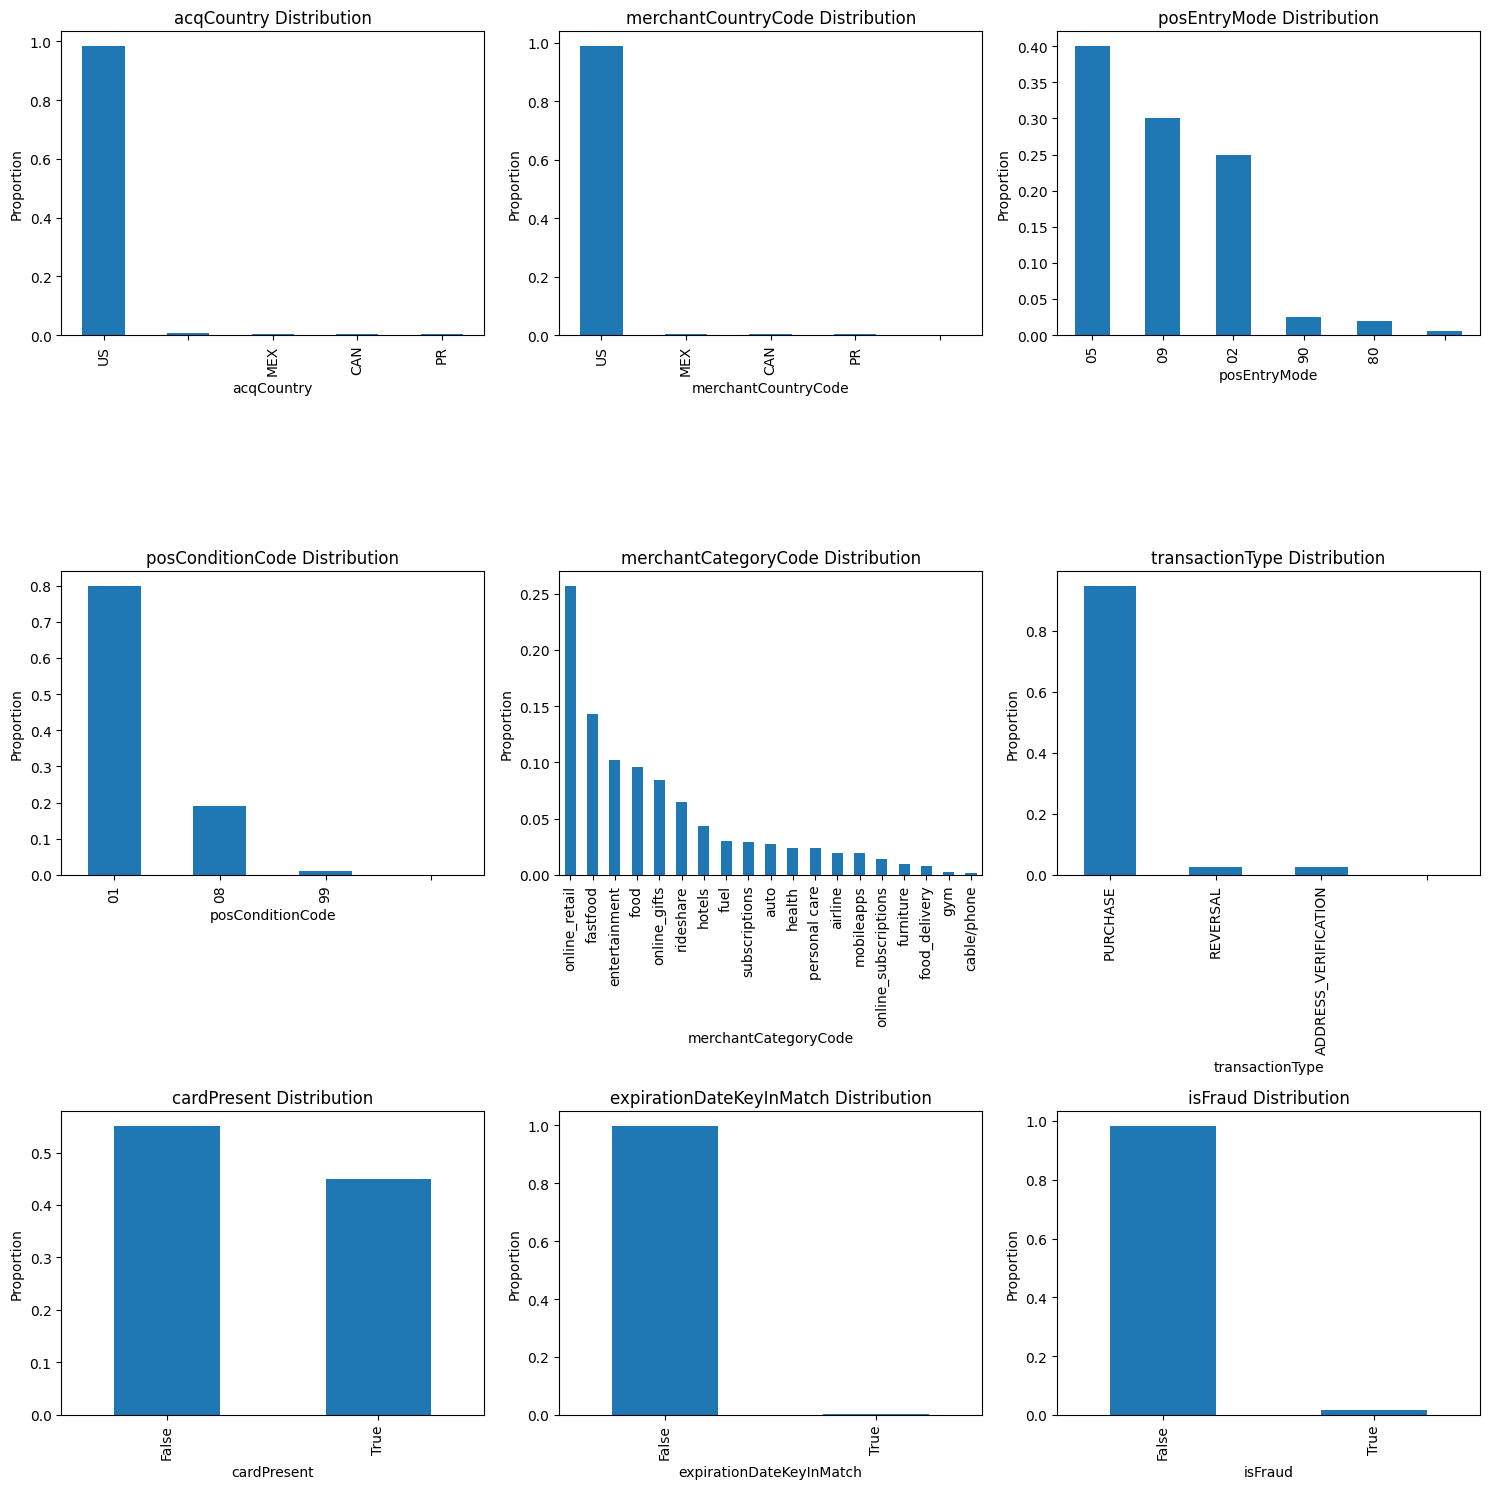

In [16]:
import matplotlib.pyplot as plt
# col_list = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode', 'transactionType', 'echoBuffer',,
# 'merchantCity','merchantState','merchantZip','cardPresent','posOnPremises','recurringAuthInd','expirationDateKeyInMatch','isFraud']
# for col in col_list:
#     df[col].value_counts(normalize=True).plot(kind='bar')
# plt.title(f"{col} Distribution")
# plt.xlabel(col)
# plt.show()

def plot_categorical_distributions(df, col_list):
    n_cols = len(col_list)
    n_rows = (n_cols + 2) // 3  # 3 plots per row

    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for idx, col in enumerate(col_list):
        df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f"{col} Distribution")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Proportion")

    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

col_list = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode', 'transactionType', 'cardPresent','expirationDateKeyInMatch','isFraud']
plot_categorical_distributions(df, col_list)

                   creditLimit  availableMoney  transactionAmount  \
creditLimit           1.000000        0.834977           0.005581   
availableMoney        0.834977        1.000000          -0.010070   
transactionAmount     0.005581       -0.010070           1.000000   
currentBalance        0.653652        0.129332           0.023905   

                   currentBalance  
creditLimit              0.653652  
availableMoney           0.129332  
transactionAmount        0.023905  
currentBalance           1.000000  


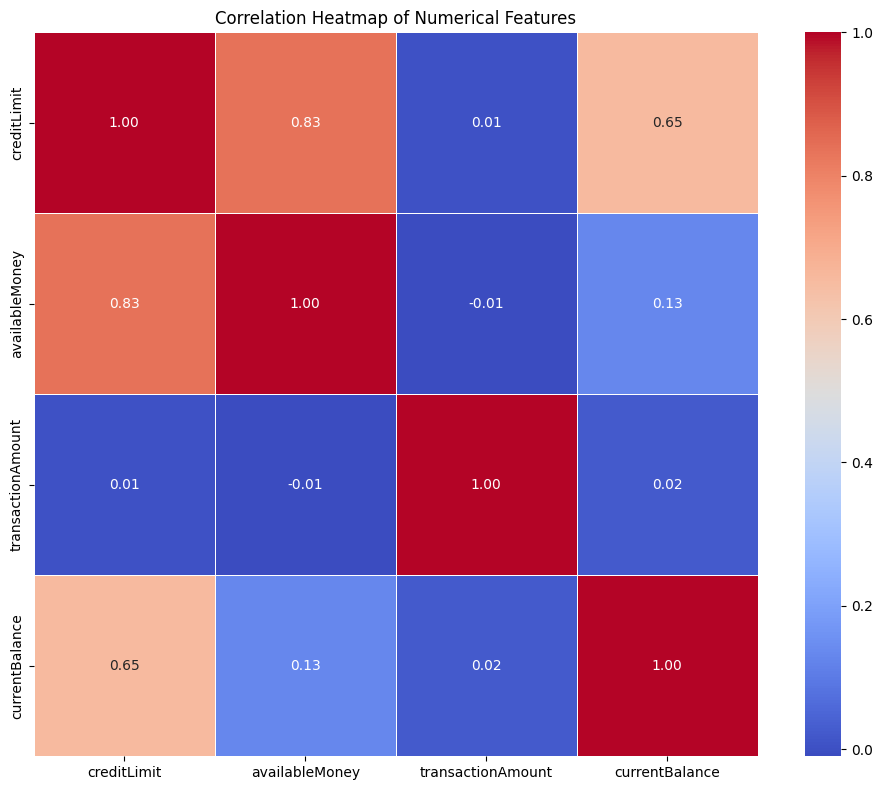

In [ ]:
import seaborn as sns
def correlation_plot(df):
    numercial_cols = df.select_dtypes(include=['number'])
    corr_mat = numercial_cols.corr()
    print(corr_mat)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

correlation_plot(df)

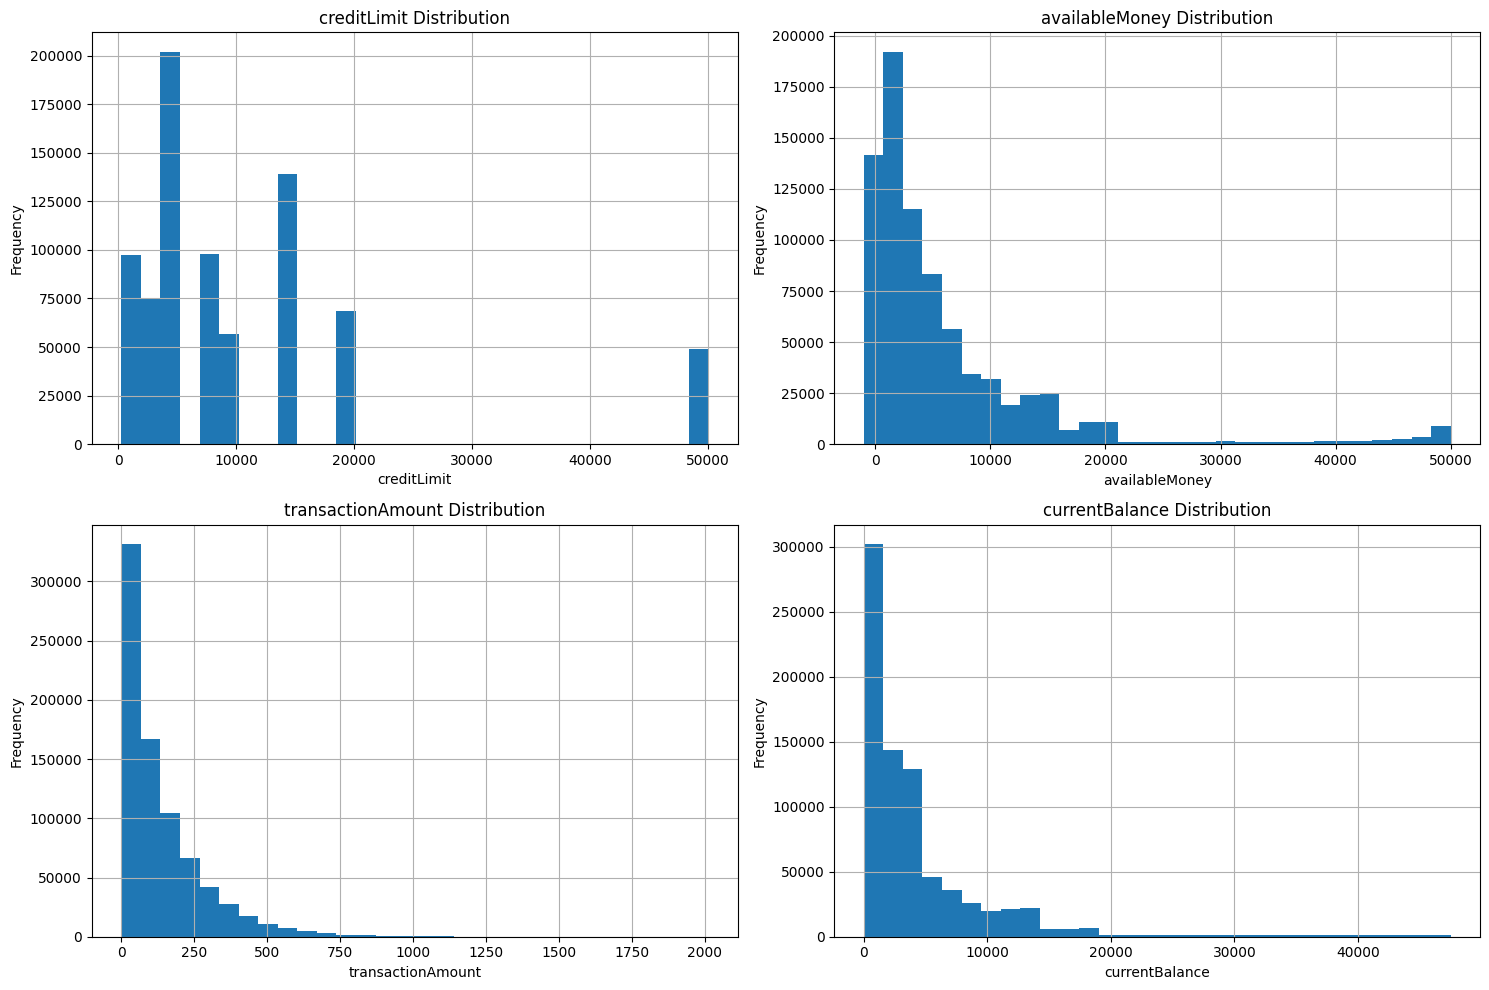

In [ ]:
import matplotlib.pyplot as plt

def historgram_plot(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    n_cols = 2  # Number of plots per row
    n_rows = -(-len(numerical_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        df[col].hist(ax=axes[i], bins=30)
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

historgram_plot(df)

In [21]:
df['creditLimit'].describe()

count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

## Temporal data

In [25]:
df[['transactionDateTime', 'currentExpDate','accountOpenDate','dateOfLastAddressChange']].head(5)

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-08-13T14:27:32,06/2023,2015-03-14,2015-03-14
1,2016-10-11T05:05:54,02/2024,2015-03-14,2015-03-14
2,2016-11-08T09:18:39,08/2025,2015-03-14,2015-03-14
3,2016-12-10T02:14:50,08/2025,2015-03-14,2015-03-14
4,2016-03-24T21:04:46,10/2029,2015-08-06,2015-08-06


In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%m/%Y')
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

# Useful derived features
df['transactionHour'] = df['transactionDateTime_conv'].dt.hour
df['transactionWeekday'] = df['transactionDateTime_conv'].dt.weekday  # 0 = Monday
df['transactionMonth'] = df['transactionDateTime_conv'].dt.month
df['transactionDate'] = df['transactionDateTime_conv'].dt.date
# Account age at time of transaction
df['accountAgeDays'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days
# Days since last address change at transaction time
df['daysSinceAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

df[['transactionDateTime_conv', 'transactionHour', 'transactionWeekday', 'daysSinceAddressChange','accountAgeDays']].head(5)

,transactionDateTime_conv,transactionHour,transactionWeekday,daysSinceAddressChange,accountAgeDays
0,2016-08-13 14:27:32,14,5,518,518
1,2016-10-11 05:05:54,5,1,577,577
2,2016-11-08 09:18:39,9,1,605,605
3,2016-12-10 02:14:50,2,5,637,637
4,2016-03-24 21:04:46,21,3,231,231


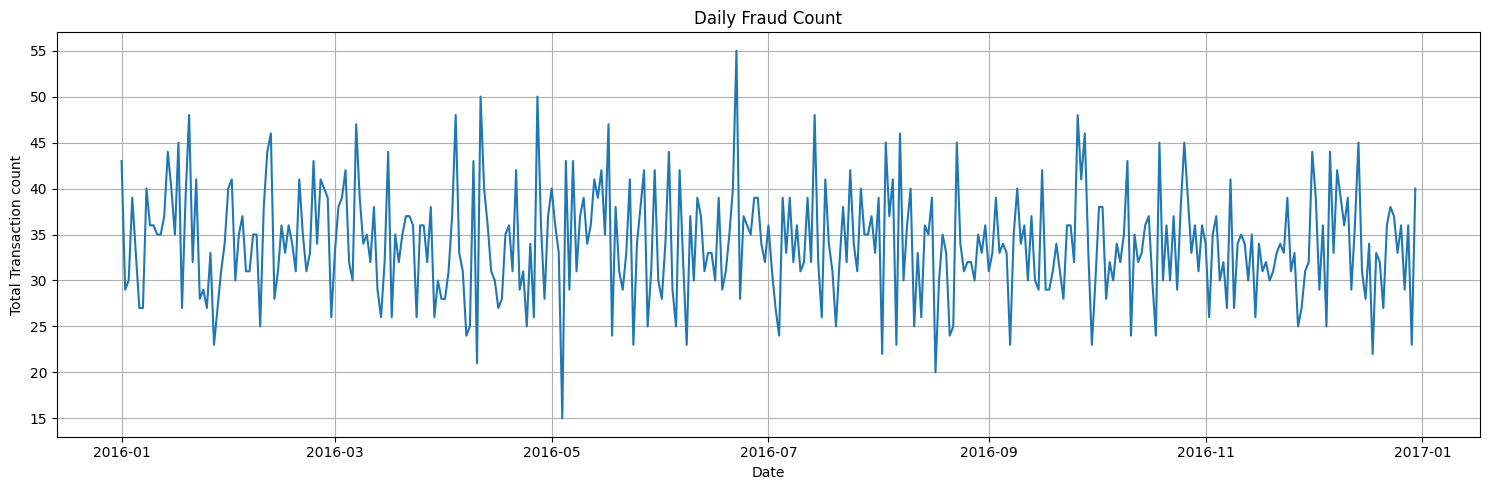

In [42]:
fraud_df = df[df['isFraud'] == 1]
daily_txn = fraud_df.groupby('transactionDate')['transactionAmount'].count()

plt.figure(figsize=(15,5))
daily_txn.plot()
plt.title("Daily Fraud Count")
plt.ylabel("Total Transaction count")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

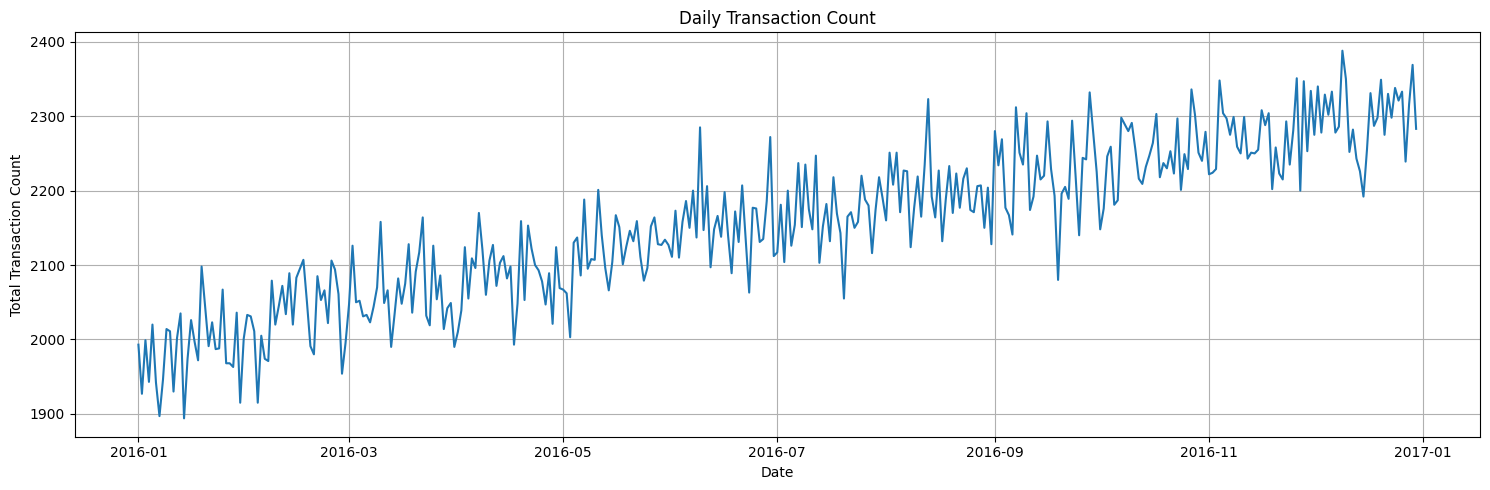

In [34]:
daily_txn = df.groupby('transactionDate')['transactionAmount'].count()

plt.figure(figsize=(15,5))
daily_txn.plot()
plt.title("Daily Transaction Count")
plt.ylabel("Total Transaction Count")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

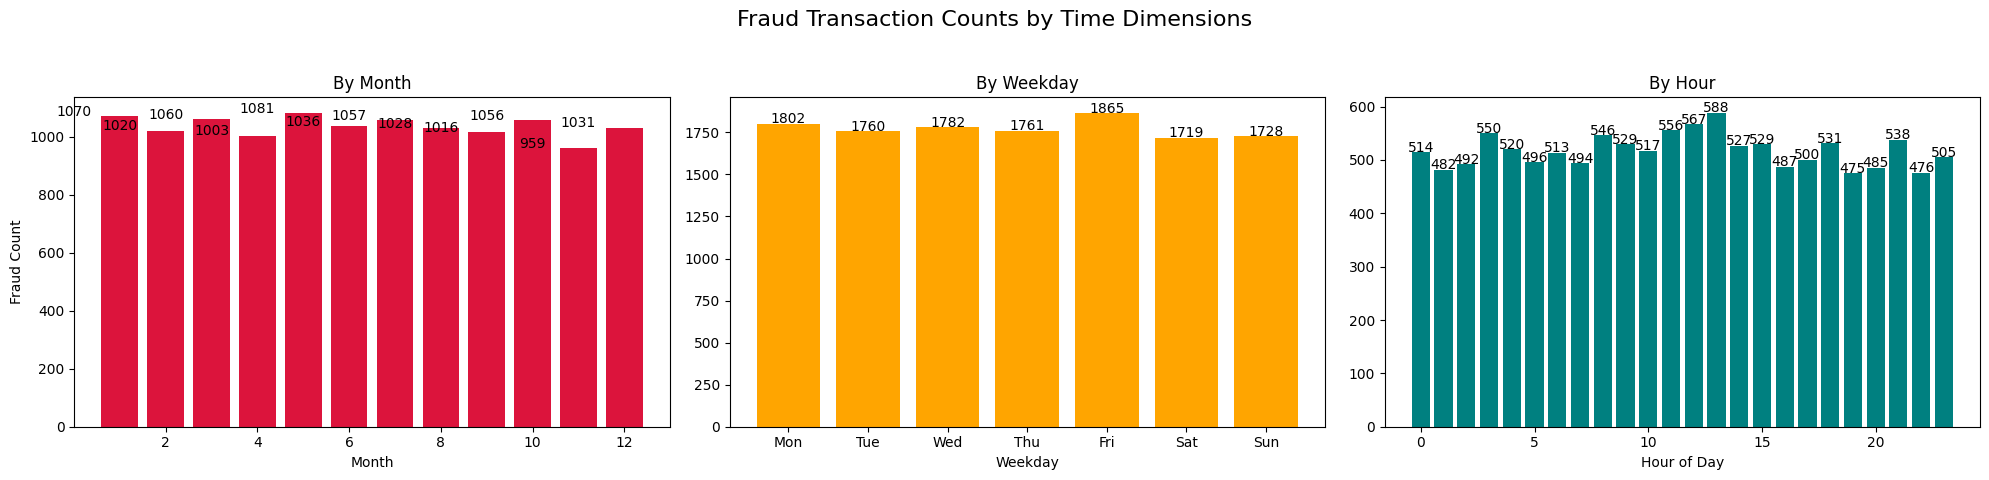

In [39]:
import matplotlib.pyplot as plt

# Preprocess
fraud_df = df[df['isFraud'] == 1]

fraud_month = fraud_df.groupby('transactionMonth')['isFraud'].count()
fraud_weekday = fraud_df.groupby('transactionWeekday')['isFraud'].count()
fraud_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fraud_hour = fraud_df.groupby('transactionHour')['isFraud'].count()

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Fraud Transaction Counts by Time Dimensions', fontsize=16)

# 1. Month
axes[0].bar(fraud_month.index, fraud_month.values, color='crimson')
axes[0].set_title('By Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Fraud Count')
for i, val in enumerate(fraud_month.values):
    axes[0].text(i, val + 1, int(val), ha='center')

# 2. Weekday
axes[1].bar(fraud_weekday.index, fraud_weekday.values, color='orange')
axes[1].set_title('By Weekday')
axes[1].set_xlabel('Weekday')
for i, val in enumerate(fraud_weekday.values):
    axes[1].text(i, val + 1, int(val), ha='center')

# 3. Hour
axes[2].bar(fraud_hour.index, fraud_hour.values, color='teal')
axes[2].set_title('By Hour')
axes[2].set_xlabel('Hour of Day')
for i, val in enumerate(fraud_hour.values):
    axes[2].text(i, val + 1, int(val), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Duplicate transactions

In [41]:
import pandas as pd

def analyze_transactions(df, reversal_time_threshold='48h', multi_swipe_time_threshold=120):
    # Load and preprocess data
    df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
    df_sorted = df.sort_values(by=['accountNumber', 'transactionDateTime'])
    
    # 1. Identify reversed transactions "Reversed transactions often occur shortly after the original purchase, indicating potential payment errors or fraud."
    purchases = df_sorted[df_sorted['transactionType'] == 'PURCHASE']
    reversals = df_sorted[df_sorted['transactionType'] == 'REVERSAL']
    
    if not reversals.empty:
        merged_reversals = pd.merge_asof(
            reversals.sort_values('transactionDateTime'),
            purchases.sort_values('transactionDateTime'),
            on='transactionDateTime',
            by=['accountNumber', 'customerId', 'transactionAmount', 'merchantName'],
            suffixes=('_reversal', '_purchase'),
            direction='backward',
            tolerance=pd.Timedelta(reversal_time_threshold)
        )
        valid_reversals = merged_reversals.dropna(subset=['merchantCategoryCode_purchase'])
    else:
        valid_reversals = pd.DataFrame()
    
    reversed_count = len(valid_reversals)
    reversed_amount = valid_reversals['transactionAmount'].sum() if not valid_reversals.empty else 0.0
    
    # 2 .Identify multi-swipe transactions "Multi-swipe transactions typically happen at the same merchant with identical amounts within a short timeframe, suggesting accidental duplicate charges."
    df_purchases = df_sorted[df_sorted['transactionType'] == 'PURCHASE'].copy()
    df_purchases['time_diff'] = df_purchases.groupby(
        ['accountNumber', 'merchantName', 'transactionAmount']
    )['transactionDateTime'].diff().dt.total_seconds().fillna(0)
    
    df_purchases['is_first'] = df_purchases.groupby(
        ['accountNumber', 'merchantName', 'transactionAmount']
    ).cumcount() == 0
    
    multi_swipe_mask = (
        (df_purchases['time_diff'] <= multi_swipe_time_threshold) & 
        (~df_purchases['is_first']))
    multi_swipe_transactions = df_purchases[multi_swipe_mask]
    
    multi_swipe_count = len(multi_swipe_transactions)
    multi_swipe_amount = multi_swipe_transactions['transactionAmount'].sum() if not multi_swipe_transactions.empty else 0.0

    
    return {
        'reversed_transactions': {
            'count': reversed_count,
            'amount': round(reversed_amount, 2)
        },
        'multi_swipe_transactions': {
            'count': multi_swipe_count,
            'amount': round(multi_swipe_amount, 2)
        }
                }

# Example usage
results = analyze_transactions(df)
results

{'reversed_transactions': {'count': 5998, 'amount': 895957.47},
 'multi_swipe_transactions': {'count': 4936, 'amount': 744546.29}}

## The end

### rough work

In [ ]:
# quick check
df.groupby(by=['transactionType']).agg({'transactionAmount':'sum', 'transactionDateTime':'count'}).reset_index()

,transactionType,transactionAmount,transactionDateTime
0,,1.084598e+05,698
1,ADDRESS_VERIFICATION,0.000000e+00,20169
2,PURCHASE,1.047903e+08,745193
3,REVERSAL,2.821792e+06,20303


In [ ]:
# Sort by time
df_sorted = df.sort_values('transactionDateTime')

# Filter reversal transactions
reversals = df_sorted[df_sorted['transactionType'] == 'REVERSAL'].copy()

# Assume we want to match against previous transaction per account
# (If account column is something like 'accountNumber' or 'customerId')
reversals['prev_txn_time'] = df_sorted.groupby('accountNumber')['transactionDateTime'].shift(1)
reversals['prev_txn_type'] = df_sorted.groupby('accountNumber')['transactionType'].shift(1)

# Compute time difference
reversals['time_gap_minutes'] = (reversals['transactionDateTime'] - reversals['prev_txn_time']).dt.total_seconds() / 60

# Inspect
reversals[['accountNumber', 'transactionDateTime', 'prev_txn_time', 'time_gap_minutes', 'transactionType','prev_txn_type']].head()


,accountNumber,transactionDateTime,prev_txn_time,time_gap_minutes,transactionType,prev_txn_type
334434,829756717,2016-01-01 01:54:16,2016-01-01 01:51:31,2.750000,REVERSAL,PURCHASE
533289,208319653,2016-01-01 03:12:54,2016-01-01 03:11:39,1.250000,REVERSAL,PURCHASE
408581,325587097,2016-01-01 03:50:28,2016-01-01 03:50:18,0.166667,REVERSAL,PURCHASE
325374,767620004,2016-01-01 06:56:25,2016-01-01 06:56:13,0.200000,REVERSAL,PURCHASE
157441,424062611,2016-01-01 08:17:29,2016-01-01 08:15:49,1.666667,REVERSAL,PURCHASE


In [ ]:
repeated = df.groupby(by=['accountNumber', 'transactionAmount']).filter(lambda x: len(x) == 2)
cols_to_show = ['accountNumber', 'transactionAmount', 'transactionDateTime', 'merchantName', 'merchantCategoryCode', 'transactionType', 'isFraud']
result = repeated[cols_to_show].sort_values(['accountNumber', 'transactionAmount', 'transactionDateTime'])
result

,accountNumber,transactionAmount,transactionDateTime,merchantName,merchantCategoryCode,transactionType,isFraud
541963,100088067,22.32,2016-11-20 07:57:05,AMC #79863,entertainment,PURCHASE,False
541964,100088067,22.32,2016-11-20 08:00:04,AMC #79863,entertainment,REVERSAL,False
541955,100088067,411.35,2016-10-16 18:01:00,Fresh Flowers,online_gifts,PURCHASE,False
541956,100088067,411.35,2016-10-16 18:01:02,Fresh Flowers,online_gifts,PURCHASE,False
87919,100328049,43.74,2016-01-15 20:34:35,Lyft,rideshare,PURCHASE,False
...,...,...,...,...,...,...,...
670052,999283629,96.56,2016-06-07 18:32:39,Lyft,rideshare,REVERSAL,False
670108,999283629,150.58,2016-11-14 23:10:41,Franks Sandwitch Bar,food,PURCHASE,False
670109,999283629,150.58,2016-11-19 18:48:08,Franks Sandwitch Bar,food,REVERSAL,False
670084,999283629,407.23,2016-09-15 06:35:31,apple.com,online_retail,PURCHASE,False


In [ ]:
# Step 1: Sort data
df_sorted = df.sort_values('transactionDateTime').reset_index(drop=True)
df_sorted['transactionDateTime'] = pd.to_datetime(df_sorted['transactionDateTime'])

# Step 2: Get reversal transactions
reversals = df_sorted[df_sorted['transactionType'] == 'REVERSAL'].sample(100, random_state=42)

# Step 3: Collect previous 5 txns from same account
context_rows = []

for _, row in reversals.iterrows():
    acct = row['accountNumber']
    txn_time = row['transactionDateTime']

    # Filter same account and previous txns
    prev_txns = df_sorted[
        (df_sorted['accountNumber'] == acct) &
        (df_sorted['transactionDateTime'] < txn_time)
    ].sort_values('transactionDateTime', ascending=False).head(5)

    # Append reversal txn itself + previous 5
    context_rows.append(prev_txns)
    context_rows.append(pd.DataFrame([row]))  # reversal itself

# Combine
context_df = pd.concat(context_rows).sort_values(['accountNumber', 'transactionDateTime']).reset_index(drop=True)


# Step 7: View sample
context_df[['accountNumber','customerId','transactionAmount', 'transactionType','transactionDateTime']].head(25)


,accountNumber,customerId,transactionAmount,transactionType,transactionDateTime
0,130354307,130354307,206.18,PURCHASE,2016-12-16 16:40:09
1,130354307,130354307,124.99,PURCHASE,2016-12-17 05:16:53
2,130354307,130354307,58.31,PURCHASE,2016-12-18 02:32:53
3,130354307,130354307,548.95,PURCHASE,2016-12-18 03:53:48
4,130354307,130354307,66.16,PURCHASE,2016-12-20 02:22:36
5,130354307,130354307,66.16,REVERSAL,2016-12-20 02:23:31
6,133105237,133105237,134.03,PURCHASE,2016-04-15 20:03:05
7,133105237,133105237,112.88,PURCHASE,2016-04-15 20:42:58
8,133105237,133105237,279.15,PURCHASE,2016-04-15 23:39:03
9,133105237,133105237,653.15,PURCHASE,2016-04-15 23:59:28


In [ ]:
# Convert datetime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Step 1: Filter purchases and reversals
purchase_df = df[df['transactionType'] == 'PURCHASE']
reversal_df = df[df['transactionType'] == 'REVERSAL']

# Step 2: Merge on matching criteria
matched = pd.merge(
    reversal_df,
    purchase_df,
    on=['accountNumber', 'customerId', 'merchantCategoryCode', 'transactionAmount'],
    suffixes=('_rev', '_pur')
)

# Step 3: Keep only those where reversal happened after purchase
matched = matched[matched['transactionDateTime_rev'] > matched['transactionDateTime_pur']]

# Step 4: Get time difference in minutes
matched['reversal_time_diff_min'] = (matched['transactionDateTime_rev'] - matched['transactionDateTime_pur']).dt.total_seconds() / 60

# Optional: For each reversal, keep the *closest* matching purchase
matched = matched.sort_values(by=['transactionDateTime_rev', 'reversal_time_diff_min']).drop_duplicates(subset='transactionDateTime_rev', keep='first')

# Step 5: Summary stats
print("Average reversal time (min):", matched['reversal_time_diff_min'].mean())
print("Median reversal time (min):", matched['reversal_time_diff_min'].median())
print(matched[['accountNumber', 'transactionAmount', 'transactionDateTime_pur', 'transactionDateTime_rev', 'reversal_time_diff_min']].head())


In [12]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df_sorted = df.sort_values(by=['accountNumber', 'transactionDateTime'])
reversal_time_threshold = '120hours'

# 1. Identify reversed transactions "Reversed transactions often occur shortly after the original purchase, indicating potential payment errors or fraud."
purchases = df_sorted[df_sorted['transactionType'] == 'PURCHASE']
reversals = df_sorted[df_sorted['transactionType'] == 'REVERSAL']
reversals['timestamp'] = reversals['transactionDateTime']
purchases['timestamp'] = purchases['transactionDateTime']

if not reversals.empty:
    merged_reversals = pd.merge_asof(
        reversals.sort_values('transactionDateTime'),
        purchases.sort_values('transactionDateTime'),
        on='transactionDateTime',
        by=['accountNumber', 'customerId', 'transactionAmount', 'merchantName'],
        suffixes=('_reversal', '_purchase'),
        direction='backward',
        tolerance=pd.Timedelta(reversal_time_threshold)
    )

merged_reversals['time_diff'] = (
        merged_reversals['transactionDateTime'] - merged_reversals['timestamp_purchase']
    ).dt.total_seconds()  # seconda

valid_reversals = merged_reversals.dropna(subset=['timestamp_purchase'])

cols = ['accountNumber',	'customerId',	'creditLimit_reversal',	'availableMoney_reversal',	'transactionDateTime',
        'transactionAmount',	'merchantName'	,'timestamp_reversal',	'merchantCategoryCode_purchase',	'timestamp_purchase', 'time_diff'
]
valid_reversals[cols].to_csv("valid_reversals2.csv")

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_15988\2391540693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reversals['timestamp'] = reversals['transactionDateTime']
C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_15988\2391540693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['timestamp'] = purchases['transactionDateTime']


In [ ]:
import pandas as pd

# Group by txndatetime and count
txndatetime_counts = df.groupby('transactionDateTime').size()

# Find txndatetime values that appear more than once
duplicate_txndatetimes = txndatetime_counts[txndatetime_counts > 1].index

# Filter original DataFrame
duplicated_txns = df[df['transactionDateTime'].isin(duplicate_txndatetimes)]

# Save to CSV
duplicated_txns.to_csv('duplicated_txns.csv', index=False)

print("Duplicated transactions saved to 'duplicated_txns.csv'")
